# Homework 2: Coding Part - Mridul Bhattarai
Due: Mar 2, 2023 at 11:00 pm

Submit through Gradescope

# Before we begin
In NumPy, the name of the game is vectorization. Whenever you have matrices and vectors, try to find an expression for them in terms of matrix manipulations. Then you can implement it NumPy so that *all* values in an array are calulated in one go. Then afterward, you can use appropriate functions (we will use `np.mean` a lot for example) to reduce the arrays. **If you can, it is best to avoid for loops and python control flows.** If you scroll down to "Linear Classification with Steepest Descent", you will see an example worked out regarding how you can try to fully utilize matrix and vector operations. 

Why?

First, the reason NumPy exists is that it has optimized these operations in C++ and is orders of magnitude faster than Python for loops. Second, while you can get away with using python control statements now (you will get the right answer, so that is not a problem), you **will not** be able to use them with Tensorflow easily. So it is best to practice to try to construct matrix and vector operations now, to prepare for using Tensorflow soon. 

Just to be clear, we will not penalize anyone for not using vectorization if they have the right answer. It is highly recommended though!



# Import datasets and extract features (copy over from the last homework)
In these first blocks, we are going to setup the same machine learning problem of classifying images of handwritten digits. Please refer to your HW1 code to copy and paste elements over to complete these first blocks, to get the problem appropriately setup.

First, just like in HW1, we will load the MNIST image dataset, normalize it, and reshape it appropriately. Don't forget to add the bias term to your features.

In case anyone has issues in this section, please contact the TAs at the lab session.

(***2 POINTS*** for the whole section)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


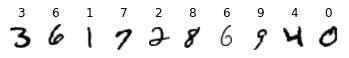

In [100]:
# Import datasets (just run this block)
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from time import time

# might take a few minutes
digit, target = fetch_openml(
    "mnist_784", return_X_y=True, as_frame=False)
#normalize each digit image to have a max value of 1, and reshape into a 3D array, with all examples along the first dimension
digit = (digit/255.0).reshape(-1,28,28)
target = target.astype(int)
#plot several digits to example
for index, (image, label) in enumerate(list(zip(digit, target))[12:22]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

Fantastic Visualization code: the following two functions are plotting tools that allow us to easily plot quantities of interest (same as we used in HW1). 

In [101]:
# just run this block
import matplotlib.lines as mlines
def newline(weight):
    # adapted from https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    if len(weight) == 2:
        p1 = weight[0]
        p2 = weight[1]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = 0
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax)
            ymin = -p1/p2*(xmin)
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    elif len(weight) == 3:
        p1 = weight[0]
        p2 = weight[1]
        b = weight[2]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = -b/p1
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax) - b/p2
            ymin = -p1/p2*(xmin) - b/p2
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    return l

def visualize_model(features, labels, weights):
    plt.figure(figsize=(5,5))
    X_features_a = features[np.where(labels==-1)]
    X_features_b = features[np.where(labels==1)]
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "{}".format(number_a))
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "{}".format(number_b))
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    # plt.ylim(features[:, 1].min(), features[:, 1].max())
    newline(weights)
    plt.gca().legend(loc = 1)
    return None

Select the two digits that you would like to classify below!

In [102]:
# in this block, you only need to modify number_a and number_b (if you wish to)
from sklearn.model_selection import train_test_split
import numpy as np

number_a = 1 # TODO choose your digit
number_b = 6 # TODO choose your digit

digit_a_indexes = np.where(target==number_a)[0][:300] # to limit data
digit_b_indexes = np.where(target==number_b)[0][:300] # take only 300

targets = np.concatenate((target[digit_a_indexes], target[digit_b_indexes]))
print(targets.shape[0])
images = np.concatenate((digit[digit_a_indexes], digit[digit_b_indexes]))
print(images.shape[0])
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

600
600


Reduce the MNIST images into the two features of interest to create your "short" feature vectors to describe each digit. Please copy and paste from your HW1 code to complete this block! 

In [103]:
# please complete this function:
def compute_features(vector):
    image = vector.reshape(28, 28) # get back original image shape
    def compute_feature_a(image):
      '''compute_feature_a will compute mean intensity'''
      meanIntensity = np.average(image)
      
      return meanIntensity

    def compute_feature_b(image):
      '''compute_feature_b will compute the symmetry'''
      ratioIntensity = np.sum(image[:14,:])/np.sum(image[14:,:])

      return ratioIntensity
    
    return compute_feature_a(image), compute_feature_b(image)

In [104]:
# Apply and plot your features (you can just run this block and inspect the output)
# This code applies the two feature computation functions to the training dataset, and then splits it into the two groups of interest

X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], 'o')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], 'x')
plt.xlabel('feature_a')

plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 

(0.4193198676252425, 1.2764370337867483)

Don't forget to append a bias term to x - a vector of all ones.

Add them to both your training and testing data composed in the matrices X_train and X_test.

In [105]:
X_features_train = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_test =  np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# add a bias term to the features
X_features_train_bias = np.hstack((X_features_train,np.ones((X_features.shape[0],1))))
X_features_test_bias = np.hstack((X_features_test,np.ones((X_features_test.shape[0],1))))

# convert training and testing labels to -1 and 1
pseudo_y_train = np.copy(y_train)
pseudo_y_train[y_train == number_a] = -1 #1
pseudo_y_train[y_train == number_b] = 1 #6 

pseudo_y_test = np.copy(y_test)
pseudo_y_test[y_test == number_a] = -1 #1
pseudo_y_test[y_test == number_b] = 1 #6 

In [106]:
def accuracy_metrics(features, label, weights):
  # features = X_features, label = pseudo label
  y_predicted = np.dot(weights,np.transpose(features))
  y_predicted[y_predicted < 0]  = -1 # assigning -1 for number_a (1)
  y_predicted[y_predicted >= 0] = 1 # assigning 1 for number_b (6)

  correct_n = (y_predicted == label).sum()

  percentAccuracy = 100*(correct_n/len(label))

  return round(percentAccuracy,2) # Return the % accuracy

*Now* we can have some fun.

# Linear Classification with Finite Differences

Rather than use pseudo inverse (analytically solving your optimization equation), we can use gradient descent methods to solve our optimization problem. In gradient descent, we see how the loss function changes when we change the weights and move 'downhill' to find the optimal weight for our model.

How do we know where is downhill? We take the gradient of the loss function with respect the to current weight vector. That gives the direction of the change. We then move opposite to that direction ('downhill'). We can numerically calculate this gradient. Recall that a derivative of a continuous function at some point $x$ is given as: $$ \lim_{δ\to 0} \frac{f(x+δ) - f(x-\delta)}{2δ}$$

We can make use of this. Note that this expression is slightly different than the definition of a discrete derivative that we used in class - it is a "center difference" derivative, as opposed to a forward or reverse difference.

To optimize the weights using finite differences to compute their gradient, start by initializing your weights parameter `w` to some random numbers. Move `w` some small `delta` amount in the each direction, and then compute the change in your loss function as a result of that small movement. Calculate the discrete gradient (i.e., the equation above applied to each weight term in the vector). Then update `w` by taking a small step in that gradient direction. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

This method of perturbing the parameters slightly and taking the difference to calculate the gradient is called the method of Finite Differences, as covered in class with the examples that we worked through.

1. First use the above finite differences method to iteratively compute an optimal value for the vector `w`, using your training data and labels to evaluate the loss function in an effort to continually decrease it until some reasonable "stopping" criterion that is up to you to define.

2. We'll evaluate the training and test error at every $n$ steps

3. We'll plot the optimal weights (i.e., the optimal decision boundary) every $n$ steps

So, first, implement the loss function. For linear classification, it is the mean squared error. 

In [107]:
def loss_mse(features, labels, weights):
  y_predicted = np.dot(weights,np.transpose(features))
  # y_predicted[y_predicted < 0]  = -1 # assigning -1 for number_a (1)
  # y_predicted[y_predicted >= 0] = 1 # assigning 1 for number_b (6)

  # return np.count_nonzero(y_predicted - labels)/len(labels) # for binary classification decision is right(0) or wrong(1, not -2)
  return np.mean(np.square(y_predicted-labels))

### Now iteratively solve for your weights `w`, which includes the bias term. Please follow the pseudo-code below, which includes two key variables. First, `delta`, which is the finite difference amount used to compute the gradient at any given iteration step, and the second is `step_size`, which defines how large a "step" you will take to update w once the finite difference gradient is estimated.

MSE after 0 iterations =  1.0983031725425028
Accuracy (in %) after 0 iterations = 50.93


MSE after 200 iterations =  0.6349547211297727
Accuracy (in %) after 200 iterations = 92.96


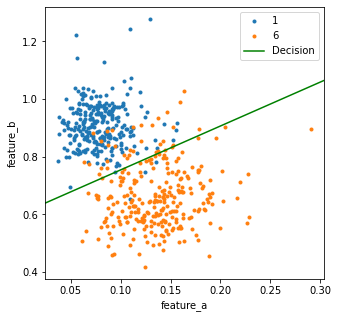

MSE after 400 iterations =  0.47891939416662915
Accuracy (in %) after 400 iterations = 93.52


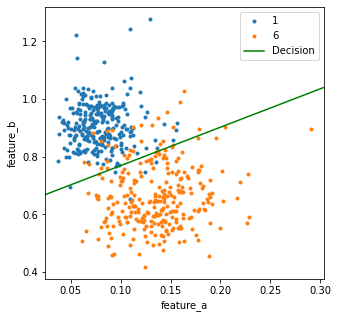

MSE after 600 iterations =  0.3963701651285755
Accuracy (in %) after 600 iterations = 93.52


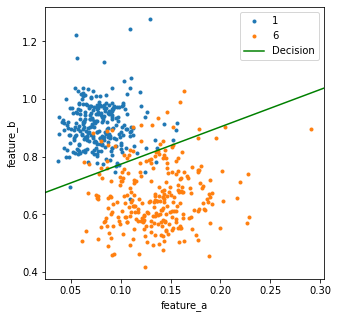

MSE after 800 iterations =  0.351648390818186
Accuracy (in %) after 800 iterations = 93.52


MSE after 1000 iterations =  0.32662970095279886
Accuracy (in %) after 1000 iterations = 93.52


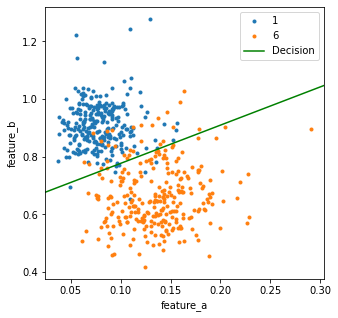

MSE after 1200 iterations =  0.31203670029833364
Accuracy (in %) after 1200 iterations = 93.52


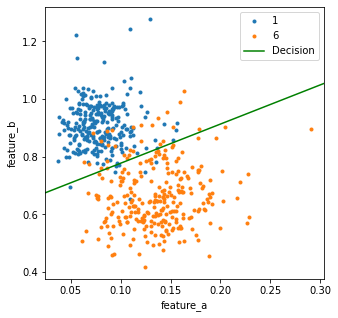

MSE after 1400 iterations =  0.303076407140209
Accuracy (in %) after 1400 iterations = 93.52


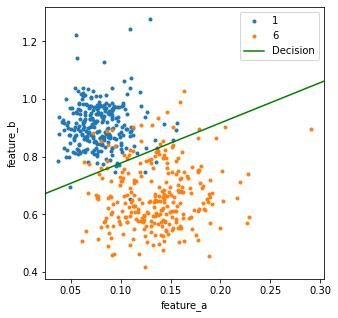

MSE after 1600 iterations =  0.297242701075196
Accuracy (in %) after 1600 iterations = 93.52


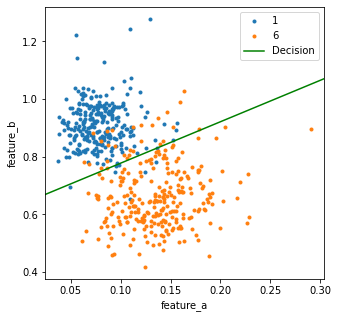

MSE after 1800 iterations =  0.2932048401959744
Accuracy (in %) after 1800 iterations = 93.52


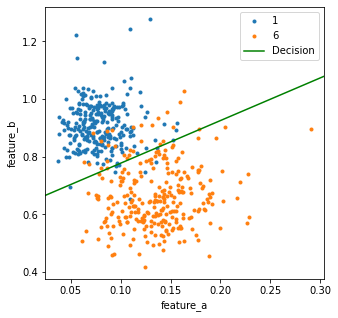

Final MSE =  0.29025518355686963
Final Accuracy (in %) = 93.52


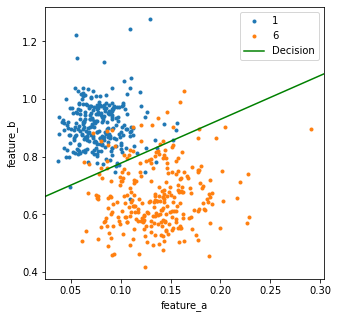

In [108]:
# Linear Classification with Finite Differences

w = np.random.rand(3) # init weights to some random value
num_iterations = 2000 # set this to the number of iterations
delta = 1e-5 # This may need to be adjusted
step_size = 1e-1 # This may also need to be adjusted
start_t = time()

for i in range(num_iterations):

  gradient_matrix = np.zeros_like(w)
  w_perturbed_pos = w.copy()
  w_perturbed_neg = w.copy()

  for j in range(3):
    
    w_perturbed_pos[j] += delta
    loss_perturbed_pos = loss_mse(X_features_train_bias,pseudo_y_train,w_perturbed_pos)

    w_perturbed_neg[j] -= delta
    loss_perturbed_neg = loss_mse(X_features_train_bias,pseudo_y_train,w_perturbed_neg)

    gradient_matrix[j] = (loss_perturbed_pos - loss_perturbed_neg)/(2*delta)

  w -= step_size * gradient_matrix

  if i % 200 == 0:
    visualize_model(X_features_train_bias, pseudo_y_train, w)
    print('MSE after', i, 'iterations = ', loss_mse(X_features_train_bias, pseudo_y_train, w))
    print('Accuracy (in %) after',i,'iterations =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
    plt.show()

end_t = time()

# Final iteration result
print('Final MSE = ', loss_mse(X_features_train_bias, pseudo_y_train, w))
print('Final Accuracy (in %) =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
visualize_model(X_features_train_bias, pseudo_y_train, w)

In [109]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

average time per iteration: 0.001918258547782898 seconds


Test Data Accuracy (in %) = 93.33
Test Data MSE =  0.24058713022251038


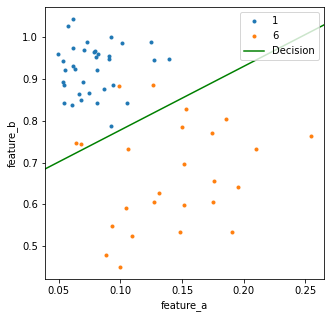

In [110]:
# Testing test data with weight from Linear Classification with Finite Differences
visualize_model(X_features_test_bias, pseudo_y_test, w)
print('Test Data Accuracy (in %) =', accuracy_metrics(X_features_test_bias, pseudo_y_test, w))
print('Test Data MSE = ', loss_mse(X_features_test_bias, pseudo_y_test, w))

# Logistic Classification with Finite Differences

Now, let's consider the same problem with a different loss function. From Problem 2 in the written part of this homework, we know that the loss function for a logistic model is:

$$L = \frac{1}{N}\sum_{i=1}^n ln(1 + e^{-y^{(i)}W^{T}x^{(i)}})$$

Use the finite differences method from above to find the optimal `w` for this loss function.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps


In [111]:
def logistic_loss(features, labels, weights):
  # return (np.log(1 + np.exp(-labels@(weights@features.T))))/len(labels)
  l = 0
  for i in range(len(labels)):
    l = l + np.log(1 + np.exp(-labels[i]*(weights.T@features[i])))
  return l/len(labels)

Logistic Loss after 0 iterations =  0.7079885897746614
Accuracy (in %) after 0 iterations = 50.93


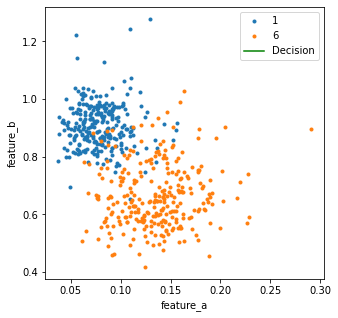

Logistic Loss after 100 iterations =  0.5662172273659376
Accuracy (in %) after 100 iterations = 90.37


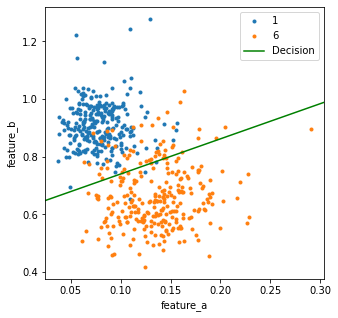

Logistic Loss after 200 iterations =  0.4807827334990469
Accuracy (in %) after 200 iterations = 92.22


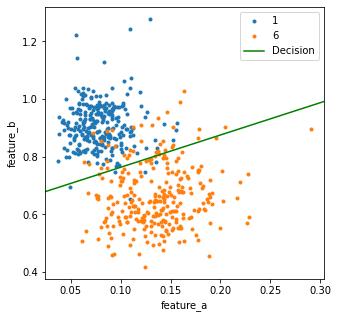

Logistic Loss after 300 iterations =  0.42413605572889007
Accuracy (in %) after 300 iterations = 92.59


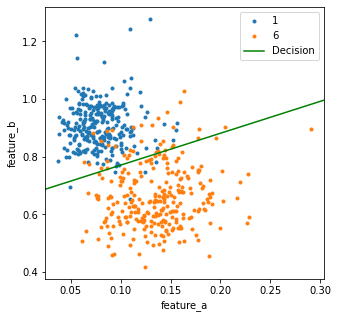

Logistic Loss after 400 iterations =  0.3844008722883717
Accuracy (in %) after 400 iterations = 92.41


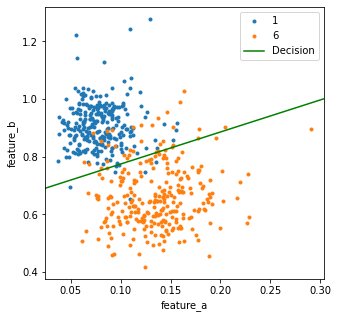

Final Logistic Loss = 0.35541840268888925
Final Accuracy (in %) = 93.15


In [112]:
# Logistic Classification with Finite Differences

w = np.random.rand(3) # init weights to some random value.
num_iterations = 500 # set this to the number of iterations
delta = 1e-5 # This may need to be adjusted
step_size = 1.2 # This may also need to be adjusted
# you might need step_size > 1 as we are taking a mean in this loss
start_t = time()

for i in range(num_iterations):

  gradient_matrix = np.zeros_like(w)
  w_perturbed_pos = w.copy()
  w_perturbed_neg = w.copy()

  for j in range(3):
    
    w_perturbed_pos[j] += delta
    loss_perturbed_pos = logistic_loss(X_features_train_bias,pseudo_y_train,w_perturbed_pos)

    w_perturbed_neg[j] -= delta
    loss_perturbed_neg = logistic_loss(X_features_train_bias,pseudo_y_train,w_perturbed_neg)

    gradient_matrix[j] = (loss_perturbed_pos - loss_perturbed_neg)/(2*delta)

  w -= step_size * gradient_matrix

  if i % 100 == 0:
    visualize_model(X_features_train_bias, pseudo_y_train, w)
    print('Logistic Loss after', i, 'iterations = ', logistic_loss(X_features_train_bias, pseudo_y_train, w))
    print('Accuracy (in %) after',i,'iterations =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
    plt.show()

end_t = time()

# Final iteration result
print('Final Logistic Loss =', logistic_loss(X_features_train_bias, pseudo_y_train, w))
print('Final Accuracy (in %) =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
visualize_model(X_features_train_bias, pseudo_y_train, w)
plt.show()

In [113]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

average time per iteration: 0.034248506546020505 seconds


Test Data Accuracy (in %) = 93.33
Test Data Logistic Loss =  0.3316430794903383


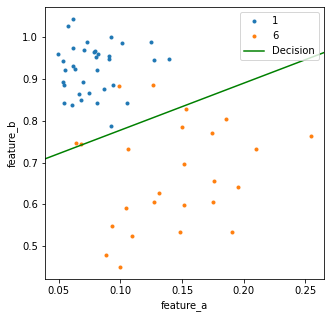

In [114]:
# Testing test data with weight from Logistic Classification with Finite Differences
visualize_model(X_features_test_bias, pseudo_y_test, w)
print('Test Data Accuracy (in %) =', accuracy_metrics(X_features_test_bias, pseudo_y_test, w))
print('Test Data Logistic Loss = ', logistic_loss(X_features_test_bias, pseudo_y_test, w))

# Linear Classification with Steepest Descent

How do we make the optimization process go faster, and perhaps provide us with a more accurate result that we can easily track? 

Right now, we numerically estimate the gradient by perturbing weight values and taking the difference in losses. What that means is that we need two forward passes for every model parameter (so total of 6 passes) to make one weight update. Imagine doing this for a neural network that has millions of parameters. We will need to perturb every one of those values, find the difference in the loss values to estimate gradient, then update the weights (and repeat). This will be way too slow. Instead, we can actually just find a closed-form expression for the gradient analytically, and use that at each step directly, instead of estimating the gradient numerically. We'd expect this process to work much faster.

So with that in mind, let's first find the gradient of the linear loss function analytically and code it up. Please refer to the derivation below, also in HW1, to establish what this gradient function is for the linear classification with mean-squared error loss case. Iniitialize your weights parameter `w` to some random numbers. Using your function, find gradient of the loss the function for the current value of the parameter `w` and then update `w` by taking a small step in direction of the steepest gradient. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

## Define the gradient

**The following example has been worked out for you.**

The loss $L$ we would like to minimize for each $i$ row in our matrix is.

$$L  = \frac{1}{2}\Sigma (y^{(i)} - W^{T}x^{(i)})^{2}$$

where

$$x^{(i)} = 
\begin{bmatrix}
    feature_a \\
    feature_b \\
\end{bmatrix}$$

$$W = 
\begin{bmatrix}
    w_1 \\
    w_2 \\
\end{bmatrix}$$

We need to find the gradient of this loss. Let us vectorize the loss. It basically converts the individual operations into a matrix operation, such that we perform the operation on all datapoints at once.

In matrix form we convert $x^{(i)}$ into $X$ which is the number of examples we have, in our case is MNIST digit features extracted.

$$X = 
\begin{bmatrix}
    feature_{a1} & feature_{b1} \\
    feature_{a2} & feature_{b2} \\
    ... & ... \\
    feature_{ai} & feature_{bi} \\
\end{bmatrix}$$

and the labels become a vector (in this case a vector of the 'pseudo' labels we have 1, and -1)

$$Y = 
\begin{bmatrix}
    label_{1} \\
    label_{2} \\
    ... \\
    label_{i} \\
\end{bmatrix}$$

Then,

$$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Analytically, we can find that $$ \frac{d}{dW}L =  - X^{T}Y + X^{T}XW  $$

In [115]:
def linear_gradient(features, labels, weights):
  # finds the gradient of the loss function wrt the weight vector
  first_term = -features.T@labels
  second_term = features.T@features@weights
  return first_term + second_term

def loss_steepest_descent(features, labels, weights):
  # finds the loss
  first_term = (labels - features@weights).T
  second_term = labels - features@weights
  return 0.5*(first_term@second_term)

### Now iteratively solve for your weights `w`, which includes the bias term.

Linear Steepest Descent loss after  0  iterations =  276.7475912141571
Accuracy (in %) after 0 iterations = 50.93


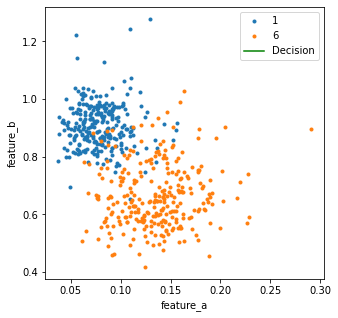

Linear Steepest Descent loss after  500  iterations =  83.57221291191114
Accuracy (in %) after 500 iterations = 92.59


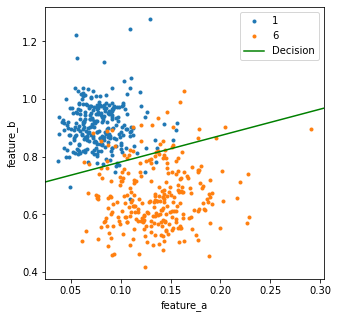

Linear Steepest Descent loss after  1000  iterations =  79.01506773481985
Accuracy (in %) after 1000 iterations = 93.7


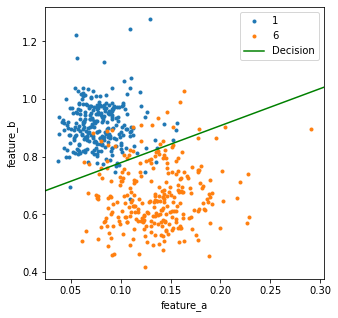

Linear Steepest Descent loss after  1500  iterations =  76.5557208263605
Accuracy (in %) after 1500 iterations = 93.33


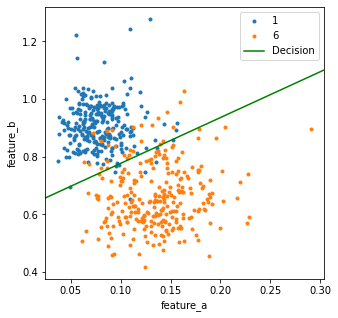

Linear Steepest Descent loss after  2000  iterations =  75.21904037572669
Accuracy (in %) after 2000 iterations = 93.7


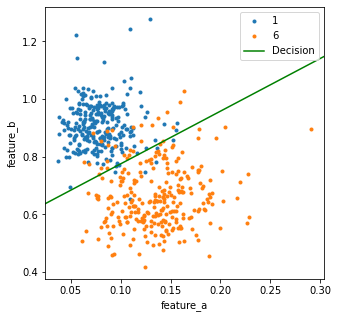

Final Linear Steepest Descent loss =  74.4935944062686
Final Accuracy (in %) = 94.07


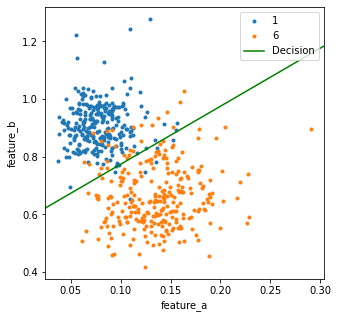

In [116]:
# Linear Classification with Steepest Descent

w = np.random.rand(3) # init weights to some random value.
num_iterations = 2500 # set this to the number of iterations
step_size = 1e-3 # This may also need to be adjusted
start_t = time()

for i in range(num_iterations):
    # calculate the gradient at the current weight vector
    gradient_matrix = linear_gradient(X_features_train_bias, pseudo_y_train, w)
    # update w some step_size in the direction of steepest descent
    w -= step_size * gradient_matrix
    
    if i % 500 == 0:
      visualize_model(X_features_train_bias, pseudo_y_train, w)
      print('Linear Steepest Descent loss after ', i, ' iterations = ', loss_steepest_descent(X_features_train_bias, pseudo_y_train, w))
      print('Accuracy (in %) after',i,'iterations =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
      plt.show()

end_t = time()

# Final accuracies and the decision boundary
print('Final Linear Steepest Descent loss = ',loss_steepest_descent(X_features_train_bias, pseudo_y_train, w))
print('Final Accuracy (in %) =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
visualize_model(X_features_train_bias, pseudo_y_train, w)

In [117]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

average time per iteration: 0.0005533017158508301 seconds


Test Data Accuracy (in %) = 93.33
Test Data Linear Steepest Descent Loss =  6.965073755754777


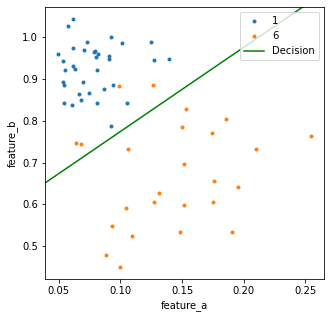

In [118]:
# Testing test data with weight from Linear Classification with Steepest Descent
visualize_model(X_features_test_bias, pseudo_y_test, w)
print('Test Data Accuracy (in %) =', accuracy_metrics(X_features_test_bias, pseudo_y_test, w))
print('Test Data Linear Steepest Descent Loss = ', loss_steepest_descent(X_features_test_bias, pseudo_y_test, w))

# Logistic Classification with Steepest Descent

Now we repeat the same process with the **Logistic Loss function** written above (under Logistic Classification with Finite Differences). You have (hopefully) calculated an equation for the gradient of this Logistic Loss function in Problem 2 of the written part of this HW2. Please implement it now as a Python function.

Iniitialize your weights parameter `w` to some random numbers. Using your function, find gradient of the loss the function for the current value of the parameter `w` and then update `w` by taking a small step in direction of the steepest gradient. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

## Define the gradient
Logistic gradient is given as:

$$\nabla_\textbf{w} L (\textbf{w}) = \frac{1}{N}\sum_{i=1}^N -y_i \textbf{x}_i \theta(-y_i \textbf{w}^T \textbf{x}_i ) $$
and $$ \theta(x) = \frac{e^x}{1+e^x} $$

In [119]:
def logistic_gradient(features, labels, weights):
  def theta(x): 
    return np.exp(x)/(1+np.exp(x))
  # return (1/len(labels))*(-labels@features)*theta(-labels@(weights@features.T))
  l = 0
  for i in range(len(labels)):
    l = l + (-labels[i]*features[i]*theta(-labels[i]*(weights.T@features[i])))
  return l/len(labels)

### Now iteratively solve for your weights `w`, which includes the bias term.

Logistic Lost after 0  iterations =  0.7157577743752986
Accuracy (in %) after 0 iterations = 50.93


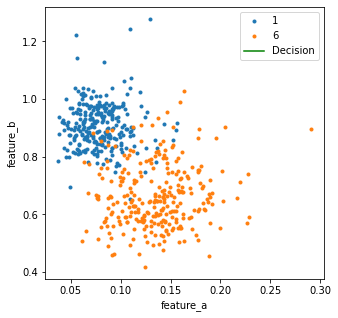

Logistic Lost after 200  iterations =  0.3962270848912595
Accuracy (in %) after 200 iterations = 91.67


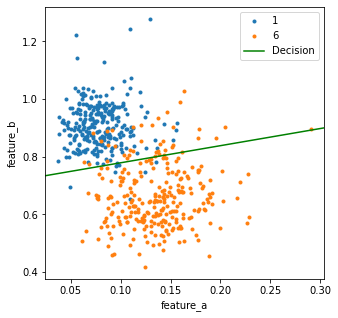

Logistic Lost after 400  iterations =  0.31463710498660685
Accuracy (in %) after 400 iterations = 92.04


Logistic Lost after 600  iterations =  0.27805359251371786
Accuracy (in %) after 600 iterations = 92.04


Logistic Lost after 800  iterations =  0.2571070888025594
Accuracy (in %) after 800 iterations = 92.04


Final Logistic Lost =  0.2434166824172408
Final Accuracy (in %) = 92.41


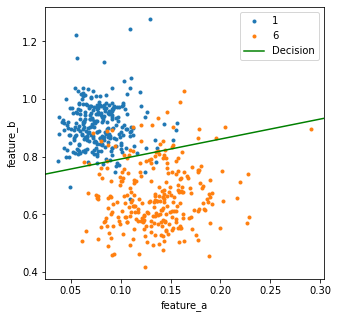

In [120]:
# Logistic Classification with Steepest Descent
w = np.random.rand(3) # init weights to some random value.
num_iterations = 1000 # set this to the number of iterations
step_size = 1.2 # This may also need to be adjusted
start_t = time()

for i in range(num_iterations):
    # calculate the gradient at the current weight vector
    gradient_matrix = logistic_gradient(X_features_train_bias,pseudo_y_train,w)
    # update w some step_size in the direction of steepest descent
    w -= step_size * gradient_matrix
    
    if i % 200 == 0:
      visualize_model(X_features_train_bias, pseudo_y_train, w)
      print('Logistic Lost after', i, ' iterations = ', logistic_loss(X_features_train_bias, pseudo_y_train, w))
      print('Accuracy (in %) after',i,'iterations =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
      plt.show()

end_t = time()
# print final accuracies and plot the decision boundary
print('Final Logistic Lost = ',logistic_loss(X_features_train_bias, pseudo_y_train, w))
print('Final Accuracy (in %) =', accuracy_metrics(X_features_train_bias, pseudo_y_train, w))
visualize_model(X_features_train_bias, pseudo_y_train, w)
    
end_t = time()

In [121]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

average time per iteration: 0.011305280447006226 seconds


Test Data Accuracy (in %) = 95.0
Test Data Logistic Steepest Descent Loss =  0.21097011070843108


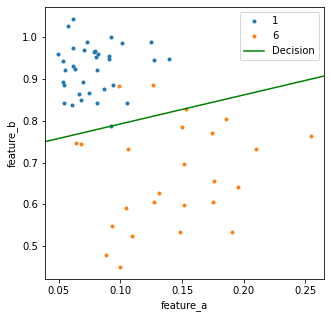

In [122]:
# Testing test data with weight from Logistic Classification with Steepest Descent
visualize_model(X_features_test_bias, pseudo_y_test, w)
print('Test Data Accuracy (in %) =', accuracy_metrics(X_features_test_bias, pseudo_y_test, w))
print('Test Data Logistic Steepest Descent Loss = ', logistic_loss(X_features_test_bias, pseudo_y_test, w))

Was Steepest Descent a faster approach? Since visualization takes a long time, commenting it out from the loop will improve your estimate for time taken. Also if you use the `%timeit` magic (refer to Lab Notebook 3 for example use or you can look it up), you will get a better estimate. (2 ***POINTS*** for a short analysis)

#Note that the estimated time below are without visualization:

**Linear Classification with Finite Differences:**
avg. time per iteration = 0.00016009831428527831 seconds

**Logistic Classification with Finite Differences:**
avg. time per iteration = 0.02692627191543579 seconds

**Linear Classification with Steepest Descent:**
avg. time per iteration = 1.8306541442871092e-05 seconds

**Logistic Classification with Steepest Descent:**
avg. time per iteration = 0.008140137910842896 seconds

Linear Classification was a faster approach than logistic classification. 
Also, classification with steepest descent was a faster approach than the classification with finite differences.